In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

In [2]:
data= pd.read_csv('Train_Data.csv')

In [3]:
data.head()

,ID1,Specific ailments,ID2,Food preference,Age,BMI,Smoker?,Living in?,Any heriditary condition?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year,Healthy
0,2408,44,2668,DX6,49,20.500470,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,25063,39,10363,DX3 DX4,20,26.076580,NO,URBAN,Stable,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
2,26798,29,132,DX6,1,21.420866,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,31907,27,10499,DX1,30,25.203247,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,26412,9,7963,DX6,40,19.355846,YES,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1


In [4]:
data.shape

(25920, 18)

In [5]:
data.dtypes

ID1                            int64
Specific ailments              int64
ID2                            int64
Food preference               object
Age                            int64
BMI                          float64
Smoker?                       object
Living in?                    object
Any heriditary condition?     object
Follow Diet                  float64
Physical activity            float64
Regular sleeping hours       float64
Alcohol consumption          float64
Social interaction           float64
Taking supplements           float64
Mental health management     float64
Illness count last year      float64
Healthy                        int64
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25920 entries, 0 to 25919
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID1                        25920 non-null  int64  
 1   Specific ailments          25920 non-null  int64  
 2   ID2                        25920 non-null  int64  
 3   Food preference            25910 non-null  object 
 4   Age                        25920 non-null  int64  
 5   BMI                        25920 non-null  float64
 6   Smoker?                    25920 non-null  object 
 7   Living in?                 25920 non-null  object 
 8   Any heriditary condition?  25920 non-null  object 
 9   Follow Diet                24947 non-null  float64
 10  Physical activity          24947 non-null  float64
 11  Regular sleeping hours     24947 non-null  float64
 12  Alcohol consumption        24947 non-null  float64
 13  Social interaction         24947 non-null  flo

In [7]:
data.isnull().sum()

ID1                            0
Specific ailments              0
ID2                            0
Food preference               10
Age                            0
BMI                            0
Smoker?                        0
Living in?                     0
Any heriditary condition?      0
Follow Diet                  973
Physical activity            973
Regular sleeping hours       973
Alcohol consumption          973
Social interaction           973
Taking supplements           973
Mental health management     973
Illness count last year      973
Healthy                        0
dtype: int64

# Handling missing Values

In [8]:
data.isnull().sum()

ID1                            0
Specific ailments              0
ID2                            0
Food preference               10
Age                            0
BMI                            0
Smoker?                        0
Living in?                     0
Any heriditary condition?      0
Follow Diet                  973
Physical activity            973
Regular sleeping hours       973
Alcohol consumption          973
Social interaction           973
Taking supplements           973
Mental health management     973
Illness count last year      973
Healthy                        0
dtype: int64

In [9]:
CONT_NUMERICAL_COLS = ['Specific ailments', 'Age', 'BMI']
DISC_NUMERICAL_COLS = ['Illness count last year']
BIN_CATEGORICAL_COLS = ['Follow Diet', 'Physical activity', 'Regular sleeping hours', 'Alcohol consumption', 'Social interaction', 'Taking supplements', 'Mental health management']
NOM_CATEGORICAL_COLS = ['Food preference', 'Smoker?', 'Living in?']
TARGET_COL = ['Healthy']

### Dealing with continuous numerical columns

In [10]:
data[CONT_NUMERICAL_COLS].describe()

,Specific ailments,Age,BMI
count,25920.000000,25920.000000,25920.000000
mean,26.502701,33.235610,23.461925
std,15.056563,19.532157,3.791150
min,0.000000,0.000000,1.145000
25%,13.000000,16.000000,20.214882
50%,26.000000,33.000000,23.415330
75%,40.000000,50.000000,26.768378
max,52.000000,149.000000,29.999579


In [11]:
data[CONT_NUMERICAL_COLS].isna().sum()

Specific ailments    0
Age                  0
BMI                  0
dtype: int64

In [12]:
data.shape

(25920, 18)

#### Dealing with discrete numerical columns

In [13]:
data[DISC_NUMERICAL_COLS].describe()

,Illness count last year
count,24947.000000
mean,1.752756
std,0.767824
min,1.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,5.000000


In [14]:
data[DISC_NUMERICAL_COLS].value_counts()

Illness count last year
1.0                        10646
2.0                        10342
3.0                         3475
4.0                          449
5.0                           35
Name: count, dtype: int64

In [15]:
data[DISC_NUMERICAL_COLS].isna().sum()

Illness count last year    973
dtype: int64

In [16]:
# let us fill tne nan values by most occuring value
data[DISC_NUMERICAL_COLS] = data[DISC_NUMERICAL_COLS].fillna(value=1.0)

In [17]:
data.shape

(25920, 18)

#### Dealing with binary categorical columns

In [18]:
data[BIN_CATEGORICAL_COLS].isna().sum()

Follow Diet                 973
Physical activity           973
Regular sleeping hours      973
Alcohol consumption         973
Social interaction          973
Taking supplements          973
Mental health management    973
dtype: int64

In [19]:
# let us know the % distribution of values
for i in range(len(BIN_CATEGORICAL_COLS)):
    print((data[BIN_CATEGORICAL_COLS][BIN_CATEGORICAL_COLS[i]].value_counts()/data[BIN_CATEGORICAL_COLS].shape[0])*100)

Follow Diet
1.0    86.211420
0.0    10.034722
Name: count, dtype: float64
Physical activity
0.0    82.959105
1.0    13.287037
Name: count, dtype: float64
Regular sleeping hours
0.0    78.499228
1.0    17.746914
Name: count, dtype: float64
Alcohol consumption
0.0    88.140432
1.0     8.105710
Name: count, dtype: float64
Social interaction
0.0    58.047840
1.0    38.198302
Name: count, dtype: float64
Taking supplements
0.0    91.138117
1.0     5.108025
Name: count, dtype: float64
Mental health management
0.0    96.207562
1.0     0.038580
Name: count, dtype: float64


In [20]:
columns_with_missing = ['Physical activity', 'Regular sleeping hours', 'Alcohol consumption',
                        'Social interaction', 'Taking supplements', 'Mental health management',
                        'Follow Diet']

# Fill missing values in specified columns with mode
data[columns_with_missing] = data[columns_with_missing].fillna(data[BIN_CATEGORICAL_COLS].mode)

In [21]:
data.isna().sum()

ID1                           0
Specific ailments             0
ID2                           0
Food preference              10
Age                           0
BMI                           0
Smoker?                       0
Living in?                    0
Any heriditary condition?     0
Follow Diet                   0
Physical activity             0
Regular sleeping hours        0
Alcohol consumption           0
Social interaction            0
Taking supplements            0
Mental health management      0
Illness count last year       0
Healthy                       0
dtype: int64

In [22]:
data.shape

(25920, 18)

In [23]:
bin_categorical_data = data[BIN_CATEGORICAL_COLS].copy() # contains the binary categorical columns

#### Dealing with nominal categorical columns

In [24]:
for i in range(len(NOM_CATEGORICAL_COLS)):
    print(data[NOM_CATEGORICAL_COLS][NOM_CATEGORICAL_COLS[i]].value_counts())

Food preference
DX6                     9639
DX5                     2167
DX2                     2128
DX4                     2099
DX3                     2072
DX1                     2063
DX1 DX2                  480
DX2 DX4                  476
DX3 DX4                  471
DX1 DX3                  461
DX4 DX5                  459
DX2 DX5                  459
DX2 DX3                  452
DX1 DX5                  450
DX3 DX5                  443
DX1 DX4                  437
DX1 DX2 DX5              116
DX1 DX3 DX4              113
DX1 DX2 DX3              110
DX1 DX2 DX4              110
DX3 DX4 DX5              109
DX2 DX3 DX5              105
DX1 DX3 DX5               98
DX2 DX4 DX5               98
DX2 DX3 DX4               90
DX1 DX4 DX5               89
DX1 DX3 DX4 DX5           27
DX2 DX3 DX4 DX5           26
DX1 DX2 DX4 DX5           23
DX1 DX2 DX3 DX4           20
DX1 DX2 DX3 DX5           16
DX1 DX2 DX3 DX4 DX5        4
Name: count, dtype: int64
Smoker?
NO            14938
YE

In [25]:
data[NOM_CATEGORICAL_COLS].isna().sum()

Food preference    10
Smoker?             0
Living in?          0
dtype: int64

In [26]:
# Fill missing values in "Food preference" column with "DX6"
data['Food preference'].fillna('DX6', inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_8592\617679337.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Food preference'].fillna('DX6', inplace=True)


In [27]:
# dropping "ID1", "ID2" because they are unique IDs and "Any heriditary condition?" because it has same value for all rows
data.drop(columns=['ID1','ID2','Any heriditary condition?'],inplace=True)

In [28]:
data.columns

Index(['Specific ailments', 'Food preference', 'Age', 'BMI', 'Smoker?',
       'Living in?', 'Follow Diet', 'Physical activity',
       'Regular sleeping hours', 'Alcohol consumption', 'Social interaction',
       'Taking supplements', 'Mental health management',
       'Illness count last year', 'Healthy'],
      dtype='object')

In [29]:
data.isnull().sum()

Specific ailments           0
Food preference             0
Age                         0
BMI                         0
Smoker?                     0
Living in?                  0
Follow Diet                 0
Physical activity           0
Regular sleeping hours      0
Alcohol consumption         0
Social interaction          0
Taking supplements          0
Mental health management    0
Illness count last year     0
Healthy                     0
dtype: int64

## EDA 📈

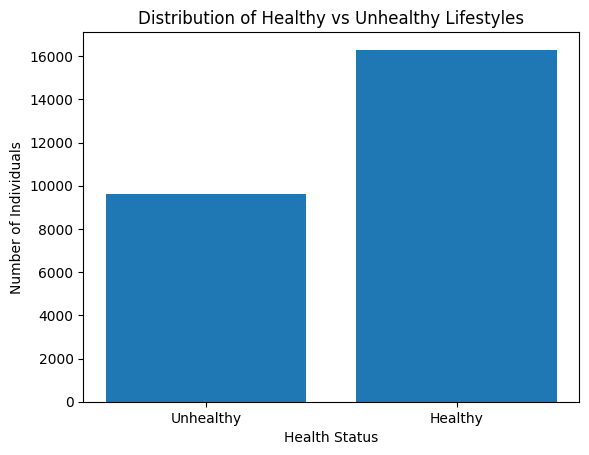

In [30]:
unique_values = data['Healthy'].unique()

value_counts = data['Healthy'].value_counts()

# Create a bar chart
plt.bar(unique_values, value_counts)
plt.xlabel('Health Status')
plt.ylabel('Number of Individuals')
plt.xticks(unique_values, [ 'Healthy', 'Unhealthy'])  
plt.title('Distribution of Healthy vs Unhealthy Lifestyles')
plt.show()

In [31]:
total_individuals = len(data)
percentage_healthy = (value_counts[1] / total_individuals) * 100
percentage_unhealthy = (value_counts[0] / total_individuals) * 100

print(percentage_healthy) 
print(percentage_unhealthy)

62.8858024691358
37.114197530864196


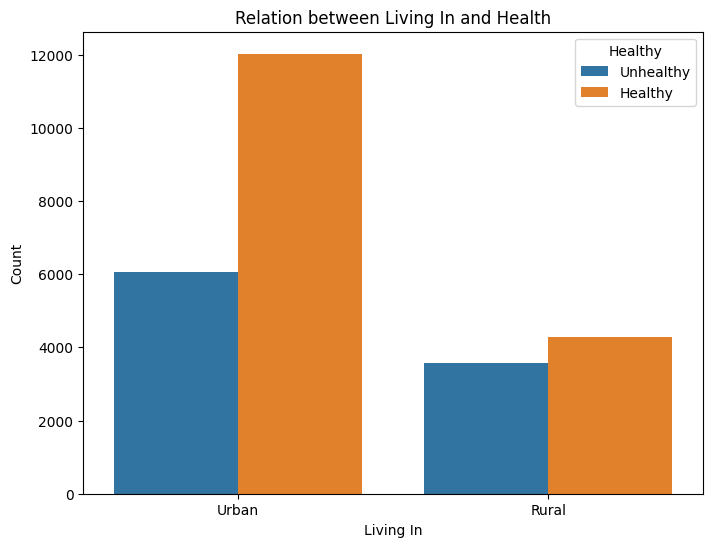

In [32]:
# Create a countplot to show the relationship between urban and rural people 
plt.figure(figsize=(8, 6))
sns.countplot(x = data['Living in?'], hue = data.Healthy)
plt.title('Relation between Living In and Health')
plt.xlabel('Living In')
plt.ylabel('Count')
plt.xticks([1, 0], ['Rural', 'Urban'])
plt.legend(title='Healthy', labels=['Unhealthy', 'Healthy'])
plt.show()

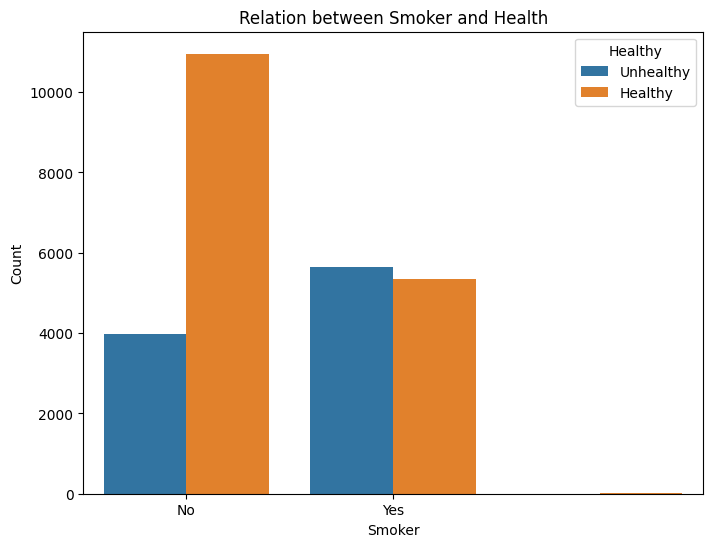

In [33]:
# Create a countplot to show the relationship between smoker and non-smoker people 
plt.figure(figsize=(8, 6))
sns.countplot(x = data['Smoker?'], hue = data.Healthy)
plt.title('Relation between Smoker and Health')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.xticks([1, 0], ['Yes', 'No'])
plt.legend(title='Healthy', labels=['Unhealthy', 'Healthy'])
plt.show()

In [34]:
data.dtypes

Specific ailments             int64
Food preference              object
Age                           int64
BMI                         float64
Smoker?                      object
Living in?                   object
Follow Diet                  object
Physical activity            object
Regular sleeping hours       object
Alcohol consumption          object
Social interaction           object
Taking supplements           object
Mental health management     object
Illness count last year     float64
Healthy                       int64
dtype: object

In [35]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

categorical_features = [ 'Living in?', 'Smoker?', 'Follow Diet',
    'Physical activity',
    'Regular sleeping hours',
    'Alcohol consumption',
    'Social interaction',
    'Taking supplements',
    'Mental health management',
                       ]


In [36]:
label_encoder = LabelEncoder()
data[categorical_features] = data[categorical_features].apply(lambda x: label_encoder.fit_transform(x.astype(str)))


In [37]:
data.dtypes

Specific ailments             int64
Food preference              object
Age                           int64
BMI                         float64
Smoker?                       int32
Living in?                    int32
Follow Diet                   int32
Physical activity             int32
Regular sleeping hours        int32
Alcohol consumption           int32
Social interaction            int32
Taking supplements            int32
Mental health management      int32
Illness count last year     float64
Healthy                       int64
dtype: object

In [38]:
data.head()

,Specific ailments,Food preference,Age,BMI,Smoker?,Living in?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year,Healthy
0,44,DX6,49,20.500470,1,0,1,0,0,0,0,0,0,1.0,1
1,39,DX3 DX4,20,26.076580,1,1,0,0,0,0,1,0,0,1.0,1
2,29,DX6,1,21.420866,1,1,1,0,0,0,0,0,0,1.0,0
3,27,DX1,30,25.203247,1,0,1,0,0,0,0,0,0,1.0,1
4,9,DX6,40,19.355846,2,0,1,0,0,0,1,0,0,2.0,1


In [39]:
data.shape

(25920, 15)

In [40]:
data.columns

Index(['Specific ailments', 'Food preference', 'Age', 'BMI', 'Smoker?',
       'Living in?', 'Follow Diet', 'Physical activity',
       'Regular sleeping hours', 'Alcohol consumption', 'Social interaction',
       'Taking supplements', 'Mental health management',
       'Illness count last year', 'Healthy'],
      dtype='object')

In [41]:
data.isnull().sum()

Specific ailments           0
Food preference             0
Age                         0
BMI                         0
Smoker?                     0
Living in?                  0
Follow Diet                 0
Physical activity           0
Regular sleeping hours      0
Alcohol consumption         0
Social interaction          0
Taking supplements          0
Mental health management    0
Illness count last year     0
Healthy                     0
dtype: int64

In [42]:
df_test_food = data[~data['Food preference'].isna()]['Food preference']
df_test_food.isna().sum()

0

In [43]:
df_test_food.shape

(25920,)

In [44]:
from sklearn.preprocessing import MultiLabelBinarizer


In [45]:
splitt = df_test_food.str.split(" ")
# print(splitt)

mlb = MultiLabelBinarizer()
test_food_binarised = mlb.fit_transform(splitt)
# print(test_food_binarised, mlb.classes_)

res = pd.DataFrame(test_food_binarised, columns=mlb.classes_)
res = res.drop([''], axis=1)
# print(res.columns)

data_final = pd.concat([data, res],axis=1)
print(data_final.shape)
data_final.head()

(25920, 21)


,Specific ailments,Food preference,Age,BMI,Smoker?,Living in?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,...,Taking supplements,Mental health management,Illness count last year,Healthy,DX1,DX2,DX3,DX4,DX5,DX6
0,44,DX6,49,20.500470,1,0,1,0,0,0,...,0,0,1.0,1,0,0,0,0,0,1
1,39,DX3 DX4,20,26.076580,1,1,0,0,0,0,...,0,0,1.0,1,0,0,1,1,0,0
2,29,DX6,1,21.420866,1,1,1,0,0,0,...,0,0,1.0,0,0,0,0,0,0,1
3,27,DX1,30,25.203247,1,0,1,0,0,0,...,0,0,1.0,1,1,0,0,0,0,0
4,9,DX6,40,19.355846,2,0,1,0,0,0,...,0,0,2.0,1,0,0,0,0,0,1


In [46]:
data_final.tail()

,Specific ailments,Food preference,Age,BMI,Smoker?,Living in?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,...,Taking supplements,Mental health management,Illness count last year,Healthy,DX1,DX2,DX3,DX4,DX5,DX6
25915,12,DX6,58,25.515286,2,0,1,0,0,0,...,0,0,1.0,1,0,0,0,0,0,1
25916,39,DX6,16,27.094959,1,0,1,0,0,0,...,0,0,1.0,0,0,0,0,0,0,1
25917,44,DX1,8,28.602921,1,0,1,1,0,0,...,0,0,2.0,1,1,0,0,0,0,0
25918,52,DX1,52,21.909832,1,0,0,1,0,1,...,0,0,2.0,1,1,0,0,0,0,0
25919,17,DX4,41,23.828813,1,0,1,0,0,0,...,0,0,1.0,1,0,0,0,1,0,0


In [47]:
data_final.drop(['Food preference'], axis=1, inplace=True)

In [48]:
data_final.shape

(25920, 20)

In [49]:
data_final.isnull().sum()

Specific ailments           0
Age                         0
BMI                         0
Smoker?                     0
Living in?                  0
Follow Diet                 0
Physical activity           0
Regular sleeping hours      0
Alcohol consumption         0
Social interaction          0
Taking supplements          0
Mental health management    0
Illness count last year     0
Healthy                     0
DX1                         0
DX2                         0
DX3                         0
DX4                         0
DX5                         0
DX6                         0
dtype: int64

### Handeling Outliers

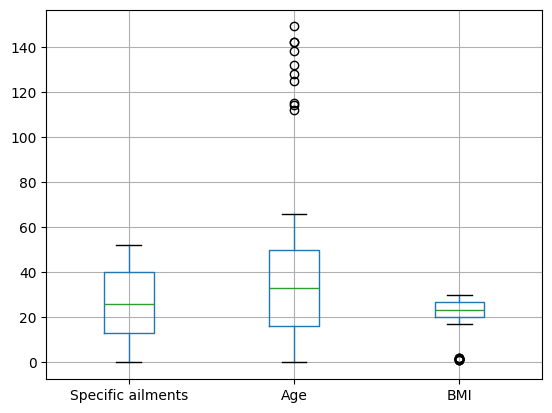

In [50]:
boxplot1 = data_final.boxplot(column=CONT_NUMERICAL_COLS)

In [51]:
def outlier_data(data: pd.DataFrame, col: str) -> pd.DataFrame:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    outlier = data[(data[col]<lower_bound)|(data[col]>upper_bound)][[col]]
    return outlier

In [52]:
print("Column : Number of outiers")
for col in CONT_NUMERICAL_COLS:
    print(col," : ", len(outlier_data(data_final[CONT_NUMERICAL_COLS], col)))

Column : Number of outiers
Specific ailments  :  0
Age  :  10
BMI  :  10


In [53]:
def remove_outlier(data: pd.DataFrame, col: str):
    for i in range(len(outlier_data(data, col)[col].unique())): # looping through each outlier value in current column
        out_lier_data = outlier_data(data, col)[col].unique() # getting the outlier data values

        # checking in case the current column has a outlier or not
        out = outlier_data(data, col)[col].unique()[0] if (len(out_lier_data) > 0) else None
        if out == None:
            continue

        index = data[data[col]==out].index.tolist() # get the index of outlier data
        data.drop(index, inplace = True)
    print("Outliers removed...")

In [54]:
for i, col in enumerate(CONT_NUMERICAL_COLS):
    print(col)
    remove_outlier(data_final, col)

Specific ailments
Outliers removed...
Age
Outliers removed...
BMI
Outliers removed...


In [55]:
data_final.shape

(25910, 20)

In [56]:
import seaborn as sns

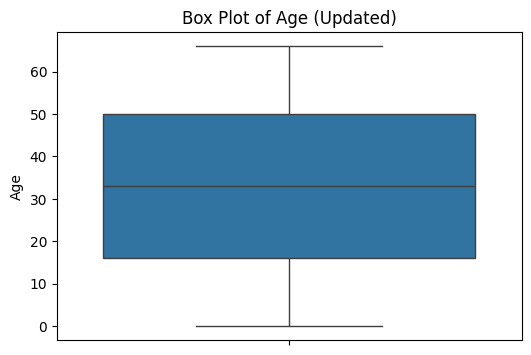

In [57]:
# updated box plot to check outliers 
plt.figure(figsize=(6, 4))
sns.boxplot(y=data_final['Age'])
plt.title('Box Plot of Age (Updated)')
plt.show()

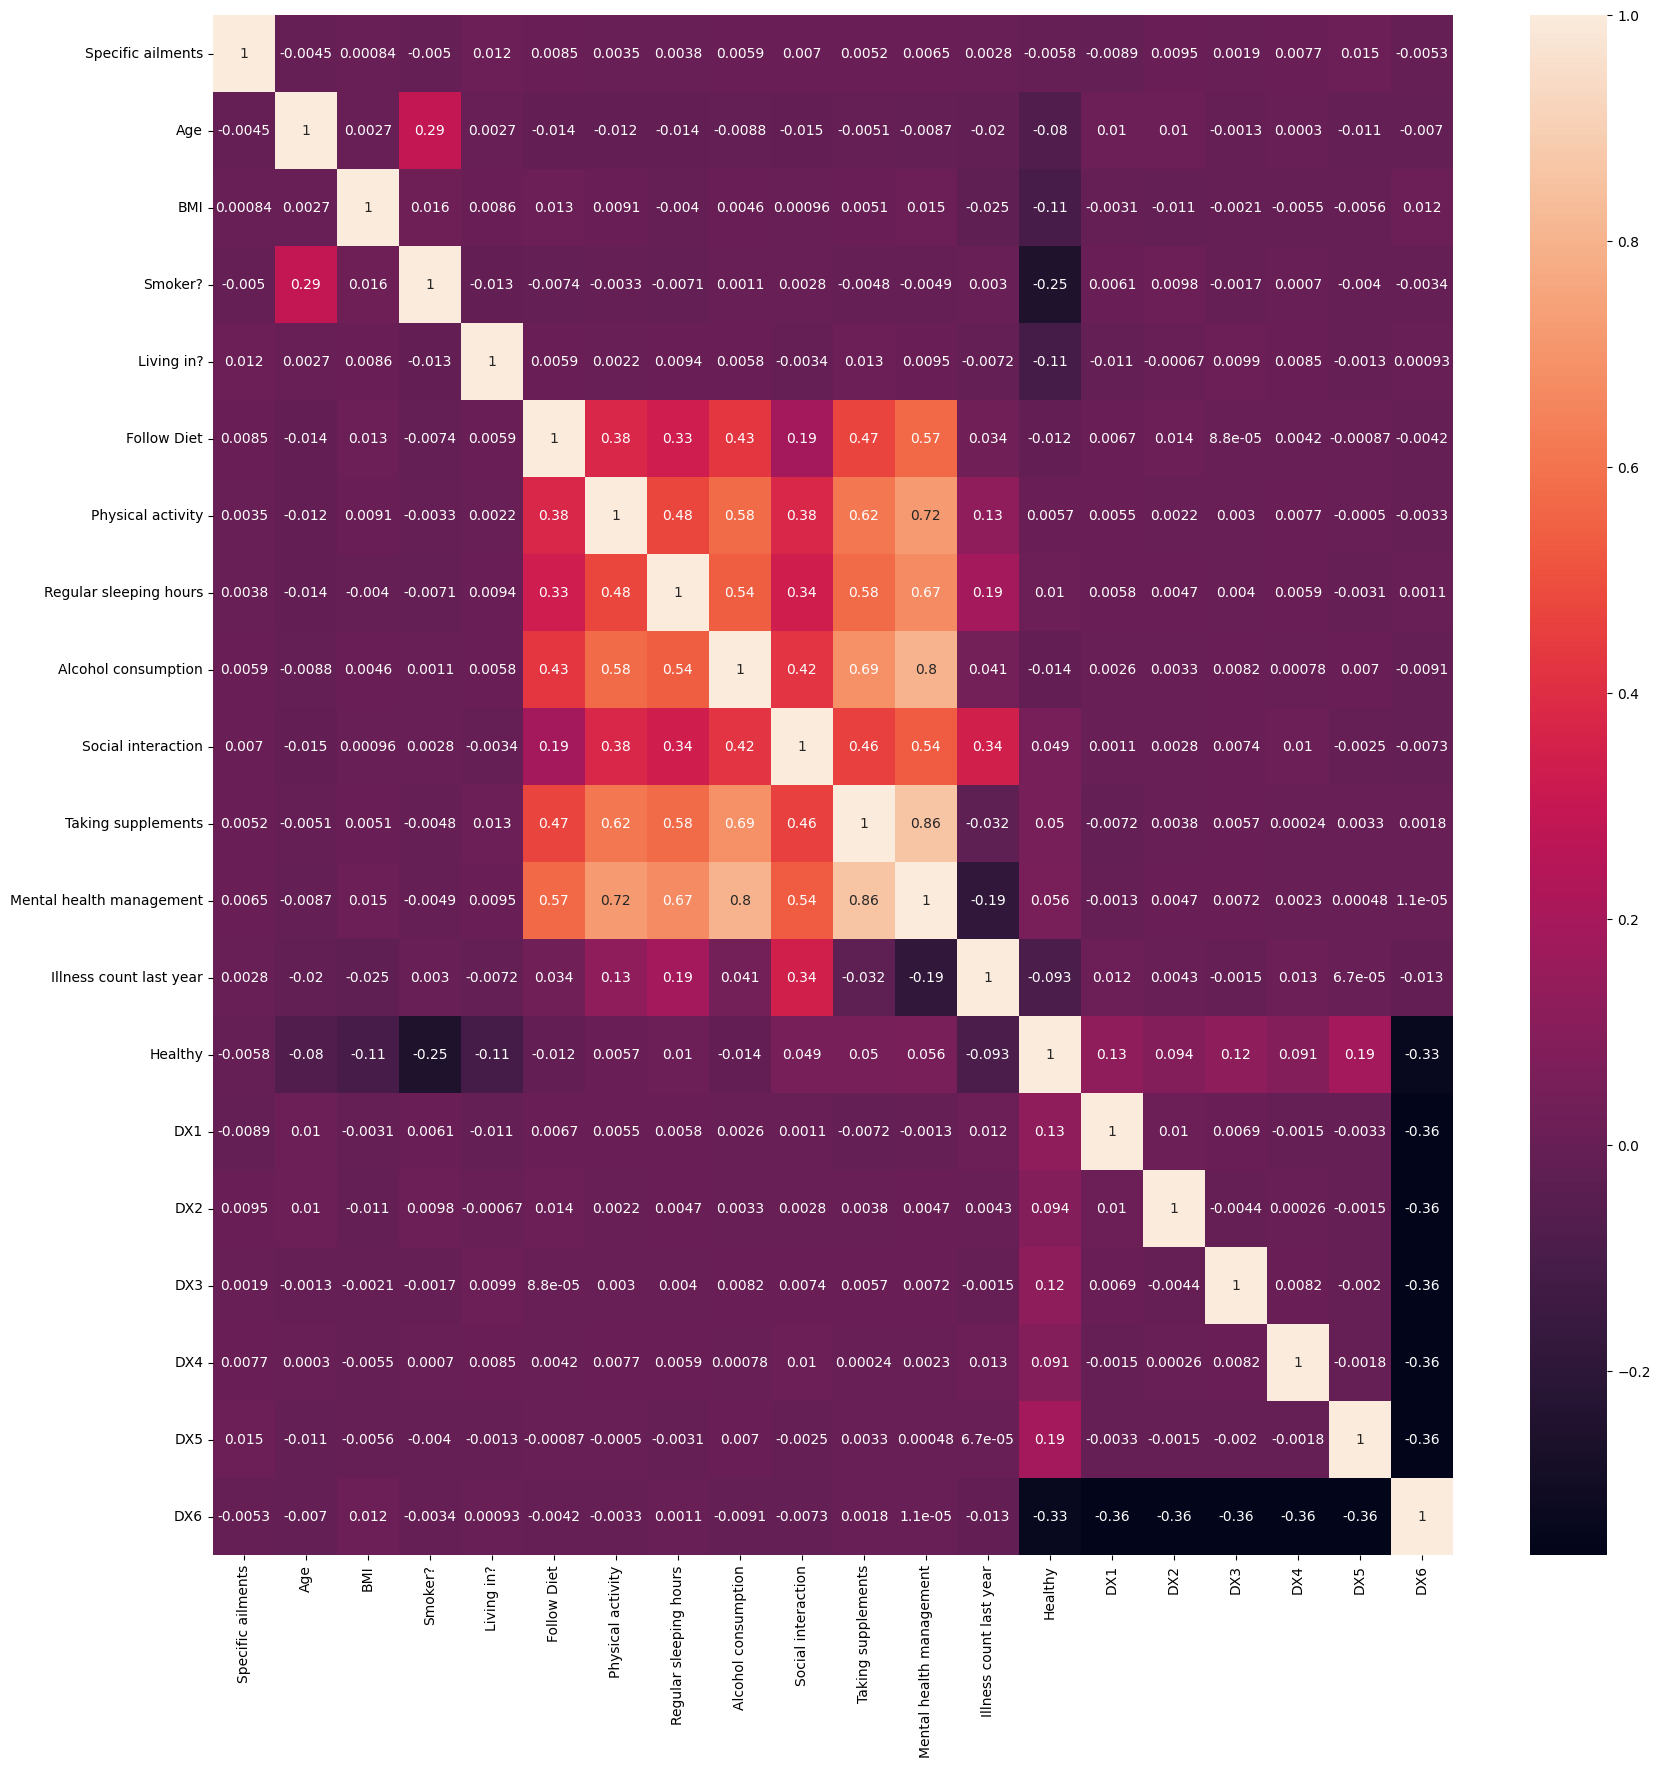

In [58]:
numeric_data = data_final.select_dtypes(include=[np.number])

# Generate the heatmap
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(numeric_data.corr(), annot=True, ax=ax)
plt.show()

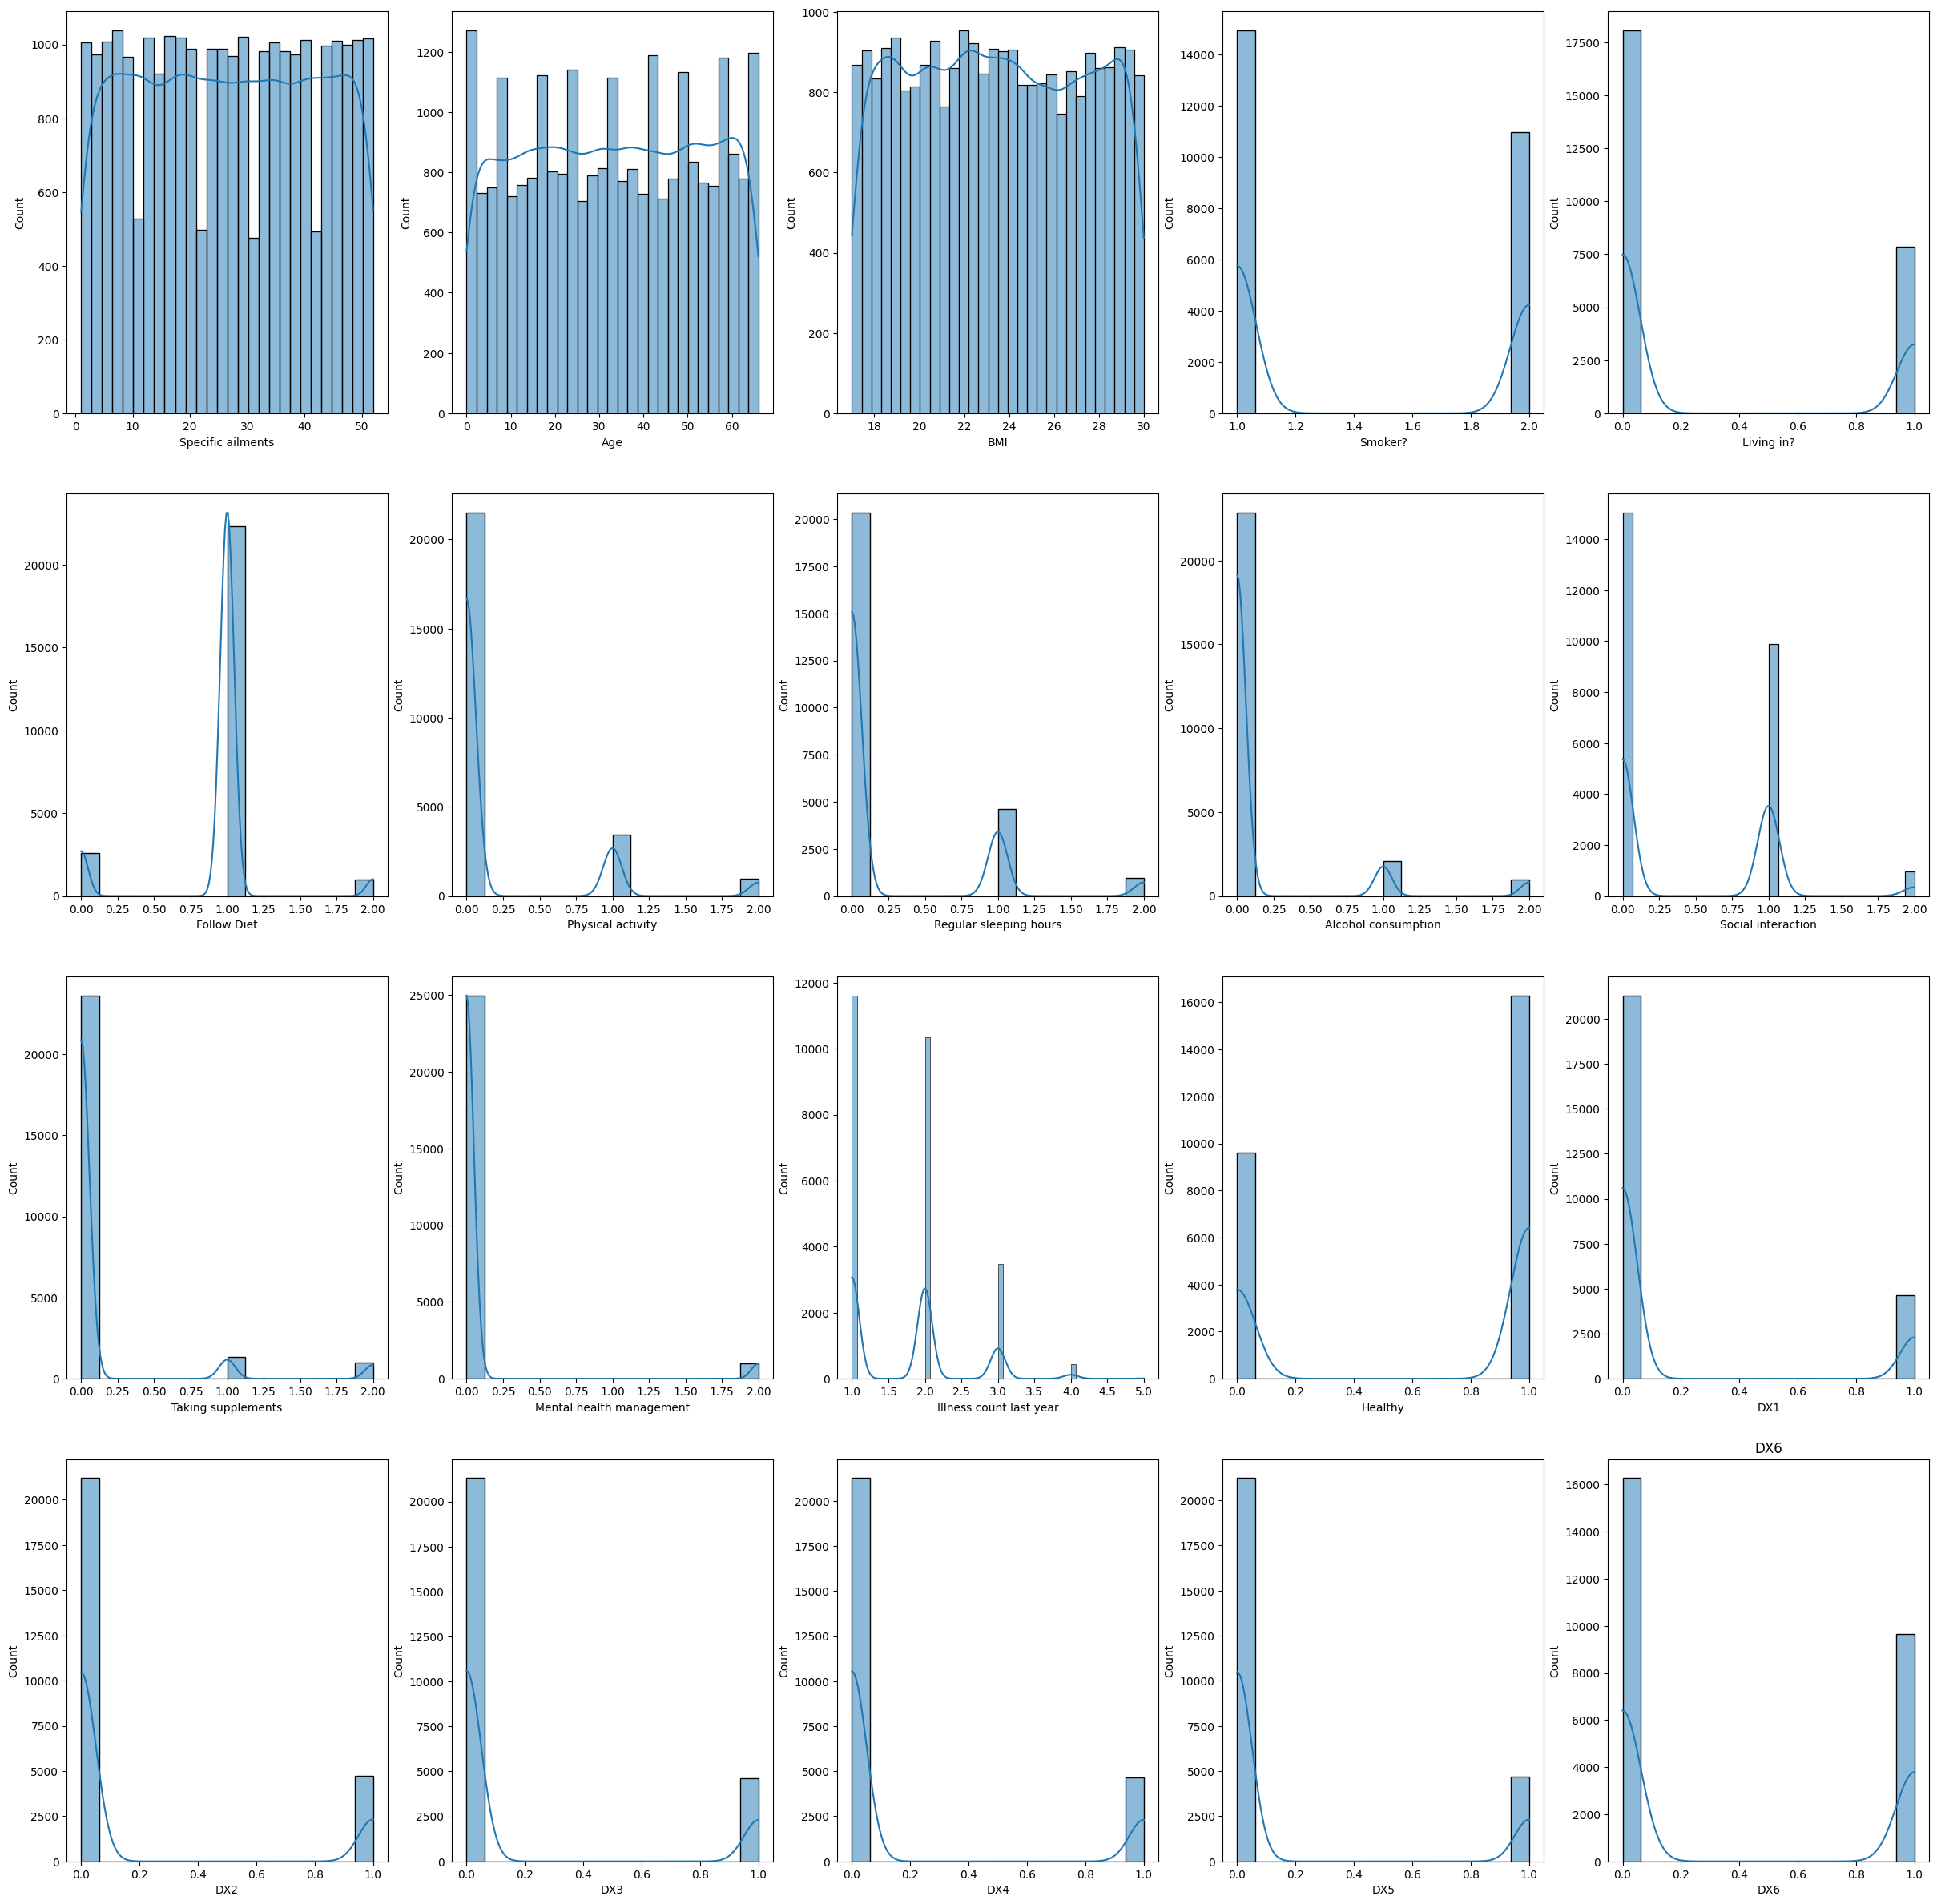

In [59]:
import seaborn as sns
fig, axs = plt.subplots(4, 5, figsize=(30, 30))
axs = axs.flatten()
i=0
df_train_cols = list(data_final.columns)
for col in df_train_cols:
    ax = axs[i]
    sns.histplot(data_final[col], kde=True, ax=ax)
    plt.title(col)
    i=i+1

## Train-test-split

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, f1_score
from sklearn.preprocessing import StandardScaler

In [61]:
X = data_final.drop(['Healthy'], axis=1)
y = data_final['Healthy']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

In [63]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(23319, 19) (2591, 19) (23319,) (2591,)


In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC,SVC
from sklearn.linear_model import LogisticRegression

In [65]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

In [66]:
models=[LogisticRegression(max_iter=500),LinearSVC(),SVC(kernel='rbf'),KNeighborsClassifier(),RandomForestClassifier(),
        DecisionTreeClassifier(),GradientBoostingClassifier(),GaussianNB(),xgb.XGBClassifier()]

In [67]:
model_names=['LogisticRegression','LinearSVM','rbfSVM','KNearestNeighbors','RandomForestClassifier','DecisionTree',
             'GradientBoostingClassifier','GaussianNB','XGBClassifier']

In [68]:
acc=[]
d={}
f1=[]

In [69]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report  # for classification

In [70]:
for model in range(len(models)):
    clf=models[model]
    clf.fit(X_train,y_train)
    pred=clf.predict(X_test)
    acc.append(accuracy_score(pred,y_test))
    f1.append(f1_score(pred,y_test))
     
d={'Modelling Algo':model_names,'Accuracy':acc}
d

{'Modelling Algo': ['LogisticRegression',
  'LinearSVM',
  'rbfSVM',
  'KNearestNeighbors',
  'RandomForestClassifier',
  'DecisionTree',
  'GradientBoostingClassifier',
  'GaussianNB',
  'XGBClassifier'],
 'Accuracy': [0.7159397915862601,
  0.7143959861057507,
  0.7549208799691239,
  0.7225009648784253,
  0.8147433423388653,
  0.76572751833269,
  0.8228483211115399,
  0.6974141258201466,
  0.8255499807024315]}

In [71]:
f={'Modelling Algo':model_names,'f1 Score':f1}

In [72]:
f

{'Modelling Algo': ['LogisticRegression',
  'LinearSVM',
  'rbfSVM',
  'KNearestNeighbors',
  'RandomForestClassifier',
  'DecisionTree',
  'GradientBoostingClassifier',
  'GaussianNB',
  'XGBClassifier'],
 'f1 Score': [0.7897142857142857,
  0.788692175899486,
  0.8247308860060724,
  0.7851807588885569,
  0.8562013181545836,
  0.8138607789021772,
  0.8645618176453231,
  0.7412541254125412,
  0.8636911942098915]}

#### Models Comparisiom

In [73]:
acc_frame=pd.DataFrame(d)
acc_frame

,Modelling Algo,Accuracy
0,LogisticRegression,0.715940
1,LinearSVM,0.714396
2,rbfSVM,0.754921
3,KNearestNeighbors,0.722501
4,RandomForestClassifier,0.814743
5,DecisionTree,0.765728
6,GradientBoostingClassifier,0.822848
7,GaussianNB,0.697414
8,XGBClassifier,0.825550


In [74]:
f1_frame=pd.DataFrame(f)
f1_frame

,Modelling Algo,f1 Score
0,LogisticRegression,0.789714
1,LinearSVM,0.788692
2,rbfSVM,0.824731
3,KNearestNeighbors,0.785181
4,RandomForestClassifier,0.856201
5,DecisionTree,0.813861
6,GradientBoostingClassifier,0.864562
7,GaussianNB,0.741254
8,XGBClassifier,0.863691


<Axes: xlabel='Accuracy', ylabel='Modelling Algo'>

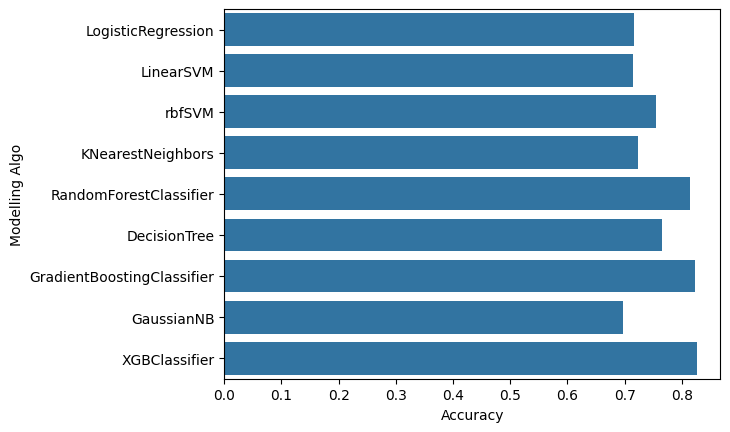

In [75]:
sns.barplot(y='Modelling Algo',x='Accuracy',data=acc_frame)

<Axes: xlabel='f1 Score', ylabel='Modelling Algo'>

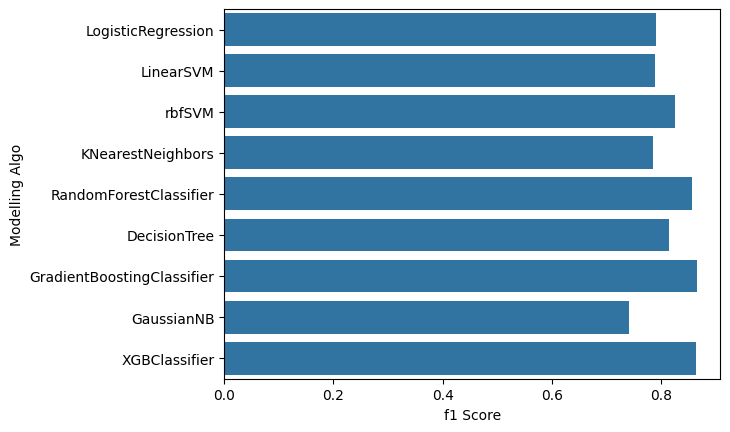

In [76]:
sns.barplot(y='Modelling Algo',x='f1 Score',data=f1_frame)

## Hyperparameter Tuning Random Forest

In [77]:
params_dict={'n_estimators':[200,400,500],'max_features':['auto','sqrt','log2']}
clf_rf=GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1),param_grid=params_dict,scoring='accuracy',cv=5)
clf_rf.fit(X_train,y_train)

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 666,

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 400, 500]},
             scoring='accuracy')

In [78]:
clf_rf.best_score_

0.8214762285044594

In [79]:
clf_rf.best_params_

{'max_features': 'sqrt', 'n_estimators': 500}

In [80]:
y_pred=clf_rf.predict(X_test)

In [81]:
accuracy = accuracy_score(y_test,y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.8093400231570822
              precision    recall  f1-score   support

           0       0.76      0.71      0.73       962
           1       0.83      0.87      0.85      1629

    accuracy                           0.81      2591
   macro avg       0.80      0.79      0.79      2591
weighted avg       0.81      0.81      0.81      2591



#### Feature Inportance

In [82]:
# Correlation analysis
correlation_matrix = X_train.corr()
correlated_features = correlation_matrix.abs().unstack().sort_values(ascending=False).drop_duplicates()
print(correlated_features)

# Feature importance with Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importance)

Specific ailments         Specific ailments           1.000000
Mental health management  Taking supplements          0.859855
Alcohol consumption       Mental health management    0.800455
Physical activity         Mental health management    0.724311
Alcohol consumption       Taking supplements          0.687982
                                                        ...   
DX4                       Age                         0.000354
DX3                       Specific ailments           0.000250
DX2                       DX4                         0.000243
DX6                       Smoker?                     0.000029
                          Regular sleeping hours      0.000003
Length: 172, dtype: float64
BMI                         0.248685
Specific ailments           0.200765
Age                         0.164464
DX6                         0.081655
Smoker?                     0.071532
Illness count last year     0.029506
Living in?                  0.026154
DX5                 